In [1]:
from sqlalchemy import create_engine
import pandas as pd
import datetime
import seaborn as sns

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, precision_score, 
                             recall_score, f1_score, roc_curve, roc_auc_score, average_precision_score, 
                             precision_recall_curve, auc)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler 

from xgboost import XGBClassifier

import datetime
import warnings
import os

warnings.filterwarnings("ignore")
from sklearn import ensemble

In [3]:
# cnx = create_engine('postgresql://username:password@ip_address:port/database')
cnx = create_engine('postgresql://ubuntu@3.23.88.140/kickstarter')

In [4]:
os.getcwd()

'/Users/briantam/Metis/project_3_Kickstarter'

In [5]:
kick = pd.read_sql_query('''SELECT * FROM kaggle''', cnx)

In [6]:
kick

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,586312960,AIDS Memorial Quilt Mobile Web App,Software,Technology,USD,2012-06-09,30000.0,2012-05-26 06:36:38,8490.0,failed,130,US,8490.00,8490.00,30000.00
1,586313611,"A Little Free Library for Leytonstone, London E11",Art,Art,GBP,2014-07-16,200.0,2014-06-18 20:48:39,200.0,successful,16,GB,339.34,341.73,341.73
2,586317132,Die etwas andere Caffeebar zum geniessen - rel...,Drinks,Food,EUR,2016-04-04,80000.0,2016-02-22 15:55:29,50.0,failed,1,DE,55.65,56.81,90903.93
3,586317692,Ghosts of the Great War: a Century's Reflectio...,Art Books,Publishing,USD,2014-09-10,25000.0,2014-08-11 17:56:01,0.0,canceled,0,US,0.00,0.00,25000.00
4,586317865,Perfect Dark - first full length studio project,Rock,Music,USD,2013-04-25,2800.0,2013-03-26 01:20:17,0.0,failed,0,US,0.00,0.00,2800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,586273217,Catholic,World Music,Music,USD,2015-11-14,50.0,2015-10-15 07:42:47,0.0,failed,0,US,0.00,0.00,50.00
378657,586273241,David Bergantino's Afraid To Love -- A Novel (...,Fiction,Publishing,USD,2013-11-09,20000.0,2013-10-10 03:08:55,640.0,canceled,15,US,640.00,640.00,20000.00
378658,586280768,UDJ (Canceled),Apps,Technology,USD,2016-02-25,5000.0,2016-02-17 20:29:04,0.0,canceled,0,US,0.00,0.00,5000.00
378659,586297060,Random Acts of Puppetry,Theater,Theater,USD,2011-06-26,2000.0,2011-03-27 08:35:59,2325.0,successful,39,US,2325.00,2325.00,2000.00


# Lets see if we can merge our BoardgameGeek data with Kickstarter to draw more insights

In [7]:
pd.read_sql_query('''SELECT COUNT(*) FROM kaggle where category ilike '%%tabletop games%%' and state = 'successful' ''', cnx)

,count
0,7866


In [8]:
BGG = pd.read_pickle('Kick_BGG_DF.pkl')

In [9]:
BGG

,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
0,1,/boardgame/174430/gloomhaven,174430,Gloomhaven,2017,8.569,8.82,36600
1,2,/boardgame/161936/pandemic-legacy-season-1,161936,Pandemic Legacy: Season 1,2015,8.470,8.62,38063
2,3,/boardgame/224517/brass-birmingham,224517,Brass: Birmingham,2018,8.297,8.64,14089
3,4,/boardgame/167791/terraforming-mars,167791,Terraforming Mars,2016,8.280,8.43,56602
4,5,/boardgame/182028/through-ages-new-story-civil...,182028,Through the Ages: A New Story of Civilization,2015,8.214,8.46,20848
...,...,...,...,...,...,...,...,...
118895,N/A,/boardgameexpansion/315328/clank-adventuring-p...,315328,Clank! Adventuring Party: Lightning Reflexes P...,2020,N/A,N/A,N/A
118896,N/A,/boardgame/315331/das-zeitungsspiel,315331,Das Zeitungsspiel,1995,N/A,N/A,N/A
118897,N/A,/boardgame/315332/sea-hunt,315332,Sea Hunt,1960,N/A,N/A,N/A
118898,N/A,/boardgame/315333/song-war-mediterranean-theater,315333,Song for War: Mediterranean Theater,2021,N/A,9.00,3


In [10]:
kick_BG = pd.read_sql_query('''SELECT * FROM kaggle where category ilike '%%tabletop games%%' ''', cnx)

In [11]:
kick_BG.shape

(14180, 15)

# Use Fuzzywuzzy to find close matches to find kickstarter matches to the games on Boardgamegeek

In [12]:
from fuzzywuzzy import fuzz
"""
Given a name (e.g. "Gloomhaven: Best Board Game Ever")
and a list of other names (e.g. ["Gloomhaven", "Pandemic"]) (this list will likely be a whole column of names, e.g. BGG["names"]),
Return the name in the list which has the highest fuzz.partial_ratio,
but the partial_ratio has to be over a threshold (default: 70).
"""
def best_partial_ratio(name, other_names, threshold=100):
    scores = [(other_name, fuzz.partial_ratio(name, other_name)) for other_name in other_names]
    best = max(scores, key=lambda p: p[1])
    if best[1] > threshold:
        return best
    return None, 0

In [13]:
# Add a new column to kick_BG, indicating which name on BGG it matched with most closely
kick_BG["BGG_match"] = kick_BG["name"].apply(lambda x: best_partial_ratio(x, BGG["names"])[0])

KeyboardInterrupt: 

In [ ]:
# Merge (using exact match) on kick_BG.BGG_match and BGG.names
merged = pd.merge(kick_BG, BGG, how="inner", left_on="BGG_match", right_on="names")
# Delete temporary column BGG_match
merged = merged.drop("BGG_match", axis=1)

In [ ]:
merged = kick_BG.merge(BGG, how ='left',left_on='name', right_on='names')
success = []
for state in merged.state:
    if state == 'successful':
        success.append(1)
    elif state in ['failed', 'canceled']:
        success.append(0)
    else:
        success.append(np.nan)
merged['success']= success
merged = merged.dropna()

In [ ]:
merged[['name','names']].describe()

In [ ]:
merged

In [ ]:
from fuzzywuzzy import fuzz
(fuzz.partial_ratio('Gloomhaven','Gloomhaven fdgsgs' ) == 100)

In [ ]:
kick_BGG['name']

In [116]:
merged = merged.sort_values('year').drop_duplicates(subset='name',keep = 'last')

In [118]:
merged

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,...,usd_pledged_real,usd_goal_real,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
14058,52387459,Pollyanna,Tabletop Games,Games,GBP,2017-09-03,100000.0,2017-07-20 17:16:47,93.00,failed,...,122.89,132138.8,N/A,/boardgame/2561/pollyanna,2561,Pollyanna,1915,N/A,6.31,24
4124,1142471304,Strategy,Tabletop Games,Games,USD,2017-04-24,10000.0,2017-03-05 16:26:44,151.00,failed,...,151.00,10000.0,N/A,/boardgame/11471/strategy,11471,Strategy,1940,N/A,7.14,9
7687,1621426228,PANIC!,Tabletop Games,Games,USD,2017-10-31,6800.0,2017-10-03 16:00:21,7028.00,successful,...,7028.00,6800.0,N/A,/boardgame/35571/panic,35571,PANIC!,1965,N/A,N/A,N/A
11813,240596400,Beat the Border,Tabletop Games,Games,USD,2016-05-20,50000.0,2016-04-20 22:45:02,1035.00,failed,...,1035.00,50000.0,N/A,/boardgame/39257/beat-border,39257,Beat the Border,1971,N/A,5.25,4
8320,1702789615,Einstein,Tabletop Games,Games,USD,2016-11-18,5000.0,2016-10-19 05:58:46,40335.00,successful,...,40335.00,5000.0,N/A,/boardgame/28543/einstein,28543,Einstein,1979,N/A,5.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1175751343,The WitchBorn: Enter Perdition,Tabletop Games,Games,USD,2016-12-05,22500.0,2016-11-11 18:47:14,30627.00,successful,...,30627.00,22500.0,N/A,/boardgame/313016/witchborn-enter-perdition,313016,The WitchBorn: Enter Perdition,2020,N/A,9.82,11
11176,2084823901,Glamazons vs The Curse of the Chainmail Bikini,Tabletop Games,Games,USD,2013-11-06,15000.0,2013-10-07 18:00:19,15574.00,successful,...,15574.00,15000.0,N/A,/boardgame/144948/glamazons-vs-curse-chainmail...,144948,Glamazons vs The Curse of the Chainmail Bikini,2020,N/A,5.29,19
13058,433614312,Pizza World,Tabletop Games,Games,USD,2017-11-14,25000.0,2017-10-08 16:31:57,390.00,failed,...,390.00,25000.0,N/A,/boardgame/237107/pizza-world,237107,Pizza World,2020,N/A,N/A,N/A
1742,799057295,Sentinels of Earth-Prime,Tabletop Games,Games,USD,2017-05-18,40000.0,2017-04-17 17:35:51,160103.00,successful,...,160103.00,40000.0,N/A,/boardgame/220609/sentinels-earth-prime,220609,Sentinels of Earth-Prime,2020,N/A,7.50,4


In [ ]:
merged[st.replace('')

In [117]:
merged[['name','names']].describe()

,name,names
count,1706,1706
unique,1706,1706
top,Off the Rails,Off the Rails
freq,1,1


In [119]:
merged.state.unique()

array(['failed', 'successful', 'canceled', 'live'], dtype=object)

In [88]:

merged_success = merged[merged['state'] == 'successful']
merged_failed = merged[
    (merged['state'] == 'failed') | 
    (merged['state'] == 'canceled') |
    (merged['state'] == 'suspended') 
]

In [69]:
merged_success[['name','names']].describe()

,name,names
count,1374,1374
unique,1254,1254
top,Speculation,Speculation
freq,8,8


In [70]:
merged_failed.groupby('state')[['name','names']].describe

name                                names                            \
         count unique                top freq count unique                top   
state                                                                           
canceled   134    123  The Old Ball Game    2   134    123  The Old Ball Game   
failed     379    341           Election    5   379    341           Election   

               
         freq  
state          
canceled    2  
failed      5

In [79]:
merged_failed.sort_values('year')

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,...,usd_pledged_real,usd_goal_real,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
14058,52387459,Pollyanna,Tabletop Games,Games,GBP,2017-09-03,100000.0,2017-07-20 17:16:47,93.0,failed,...,122.89,132138.80,N/A,/boardgame/2561/pollyanna,2561,Pollyanna,1915,N/A,6.31,24
9547,1891560371,Conquest,Tabletop Games,Games,USD,2015-12-05,5000.0,2015-11-09 18:52:39,411.0,failed,...,411.00,5000.00,N/A,/boardgame/32695/conquest,32695,Conquest,1936,N/A,3.00,1
5634,1316351440,Buccaneer,Tabletop Games,Games,USD,2016-10-14,10000.0,2016-09-08 18:02:37,453.0,failed,...,453.00,10000.00,7937,/boardgame/3084/buccaneer,3084,Buccaneer,1938,5.575,5.99,323
4124,1142471304,Strategy,Tabletop Games,Games,USD,2017-04-24,10000.0,2017-03-05 16:26:44,151.0,failed,...,151.00,10000.00,N/A,/boardgame/11471/strategy,11471,Strategy,1940,N/A,7.14,9
11813,240596400,Beat the Border,Tabletop Games,Games,USD,2016-05-20,50000.0,2016-04-20 22:45:02,1035.0,failed,...,1035.00,50000.00,N/A,/boardgame/39257/beat-border,39257,Beat the Border,1971,N/A,5.25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,997399480,Ambrosia,Tabletop Games,Games,EUR,2016-11-08,20000.0,2016-10-11 15:56:39,4074.0,failed,...,4442.31,21808.11,11234,/boardgame/282055/ambrosia,282055,Ambrosia,2019,5.535,7.06,42
6056,1398277127,Diamond Dig,Tabletop Games,Games,USD,2017-10-05,10000.0,2017-09-04 19:30:04,1004.0,failed,...,1004.00,10000.00,N/A,/boardgame/301679/diamond-dig,301679,Diamond Dig,2020,N/A,N/A,N/A
1696,793587074,Monkeys On Your Back,Tabletop Games,Games,EUR,2016-12-27,15000.0,2016-11-27 20:14:01,3715.0,failed,...,3915.97,15811.44,N/A,/boardgame/299152/monkeys-your-back,299152,Monkeys On Your Back,2020,N/A,N/A,N/A
8361,1708318913,Reincardnated,Tabletop Games,Games,USD,2015-11-01,20000.0,2015-10-01 15:02:24,3799.0,failed,...,3799.00,20000.00,N/A,/boardgame/300407/reincardnated,300407,Reincardnated,2020,N/A,N/A,N/A


In [91]:
merged_failed = merged_failed.sort_values('year').drop_duplicates(subset='name',keep = 'last')
merged_success = merged_success.sort_values('year').drop_duplicates(subset='name',keep = 'last')

In [124]:
success = []
for state in merged.state:
    if state == 'successful':
        success.append(1)
    elif state in ['failed', 'canceled']:
        success.append(0)
    else:
        success.append(np.nan)
merged['success']= success

In [92]:
merged_failed[merged_failed['name']=='Election']

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,...,usd_pledged_real,usd_goal_real,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
2314,901908193,Election,Tabletop Games,Games,USD,2015-09-09,18000.0,2015-08-06 20:45:15,1705.0,failed,...,1705.0,18000.0,N/A,/boardgame/170585/election,170585,Election,2015,N/A,N/A,N/A


In [93]:
merged_success[merged_success['name']=='Speculation']

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,...,usd_pledged_real,usd_goal_real,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
10465,1991381514,Speculation,Tabletop Games,Games,USD,2013-04-05,10000.0,2013-03-06 11:20:00,37445.0,successful,...,37445.0,10000.0,N/A,/boardgame/39184/speculation,39184,Speculation,2008,N/A,6.75,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5ca6eb100>,
      dtype=object)

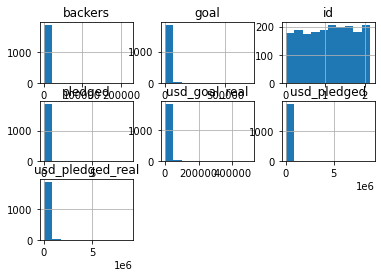

In [114]:
merged.hist()

In [19]:
merged_failed.head(6)

,id,name,category,main_category,currency,deadline,goal,lauched,pledged,state,...,usd_pledged_real,usd_goal_real,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes
0,586321943,The Science Lab Memory Game: A STEM Initiative.,Tabletop Games,Games,CAD,2015-07-18,4000.0,2015-06-09 16:45:56,954.00,failed,...,728.74,3055.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,586594160,Battledexx - Tactical BattlesTrading Card Game...,Tabletop Games,Games,GBP,2015-09-26,8000.0,2015-08-12 13:47:48,1232.00,canceled,...,1868.59,12133.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,586965542,Nuts & Knockers: A Hilarious Party Game for (i...,Tabletop Games,Games,USD,2014-03-27,15000.0,2014-02-25 16:29:31,1441.00,failed,...,1441.00,15000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,587184050,THE WAR OF THE BALLS,Tabletop Games,Games,SEK,2017-07-30,90000.0,2017-05-31 01:24:49,1019.00,failed,...,125.91,11120.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,588191626,In the Dark: Trial Edition,Tabletop Games,Games,USD,2016-08-15,650.0,2016-08-12 16:38:23,266.00,failed,...,266.00,650.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,588296480,Quantum Minstrel: Integrated Tabletop RPG Audi...,Tabletop Games,Games,NZD,2014-01-06,3000.0,2013-12-10 10:48:20,1430.66,failed,...,1176.14,2466.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load Kickstarter data as DataFrame using 

In [14]:
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  object        
 6   goal              378661 non-null  float64       
 7   lauched           378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd_pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [15]:
pd.to_datetime(kick.deadline.values)

DatetimeIndex(['2012-06-09', '2014-07-16', '2016-04-04', '2014-09-10',
               '2013-04-25', '2015-07-18', '2011-05-25', '2016-09-19',
               '2014-09-23', '2013-06-12',
               ...
               '2011-07-24', '2017-09-26', '2013-06-20', '2016-01-01',
               '2011-10-22', '2015-11-14', '2013-11-09', '2016-02-25',
               '2011-06-26', '2013-12-21'],
              dtype='datetime64[ns]', length=378661, freq=None)

# Prelim Feature Engineering

In [16]:
kick['duration'] = (pd.to_datetime(kick.deadline.values)-pd.to_datetime(kick.lauched))/ np.timedelta64(1, 'D')

In [17]:
success = []
for state in kick.state:
    if state == 'successful':
        success.append(1)
    else:
        success.append(0)

In [18]:
kick['success']= success

# Drop columns

In [164]:
df=kick.drop(['id','name','currency','deadline','lauched','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real','state'],1)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       378661 non-null  object 
 1   main_category  378661 non-null  object 
 2   goal           378661 non-null  float64
 3   country        378661 non-null  object 
 4   duration       378661 non-null  float64
 5   success        378661 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 17.3+ MB


In [166]:
df_dummies = pd.get_dummies(df[['category','main_category', 'country']],drop_first=True)
df = df_dummies.merge(df,how='inner',left_index=True, right_index=True)
df = df.drop(['category','main_category', 'country'],1)
print(df.shape)

(378661, 197)


In [167]:
df

,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,category_Digital Art,category_Documentary,category_Drama,category_Drinks,category_Electronic Music,category_Embroidery,category_Events,category_Experimental,category_Fabrication Tools,category_Faith,category_Family,category_Fantasy,category_Farmer's Markets,category_Farms,category_Fashion,category_Festivals,category_Fiction,category_Film & Video,category_Fine Art,category_Flight,category_Food,category_Food Trucks,category_Footwear,category_Gadgets,category_Games,category_Gaming Hardware,category_Glass,category_Graphic Design,category_Graphic Novels,category_Hardware,category_Hip-Hop,category_Horror,category_Illustration,category_Immersive,category_Indie Rock,category_Installations,category_Interactive Design,category_Jazz,category_Jewelry,category_Journalism,category_Kids,category_Knitting,category_Latin,category_Letterpress,category_Literary Journals,category_Literary Spaces,category_Live Games,category_Makerspaces,category_Metal,category_Mixed Media,category_Mobile Games,category_Movie Theaters,category_Music,category_Music Videos,category_Musical,category_Narrative Film,category_Nature,category_Nonfiction,category_Painting,category_People,category_Performance Art,category_Performances,category_Periodicals,category_Pet Fashion,category_Photo,category_Photobooks,category_Photography,category_Places,category_Playing Cards,category_Plays,category_Poetry,category_Pop,category_Pottery,category_Print,category_Printing,category_Product Design,category_Public Art,category_Publishing,category_Punk,category_Puzzles,category_Quilts,category_R&B,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Romance,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Taxidermy,category_Technology,category_Television,category_Textiles,category_Theater,category_Thrillers,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Art,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,goal,duration,success
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30000.0,13.724

# Start training and testing

In [83]:
df['duration'].describe()

count    378661.000000
mean         33.915400
std          65.913304
min           0.005058
25%          29.097639
50%          29.689259
75%          36.649815
max       16738.958333
Name: duration, dtype: float64

In [23]:
df.columns

Index(['category_Academic', 'category_Accessories', 'category_Action',
       'category_Animals', 'category_Animation', 'category_Anthologies',
       'category_Apparel', 'category_Apps', 'category_Architecture',
       'category_Art',
       ...
       'country_N,0"', 'country_NL', 'country_NO', 'country_NZ', 'country_SE',
       'country_SG', 'country_US', 'goal', 'duration', 'success'],
      dtype='object', length=197)

In [182]:
X, y = df.drop('success',axis=1), df['success']
print(X.shape, y.shape)

(378661, 196) (378661,)


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

# print(X_train.shape, y_train.shape)
# print(X_test.shape,y_test.shape)

X_array, y_array = np.array(X_train), np.array(y_train)

# Undersample so that positives and negatives are the same size

Text(0.5, 1.0, 'success vs failure distribution')

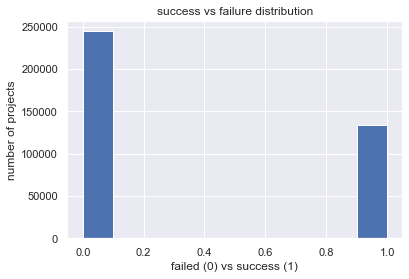

In [178]:
df['success'].hist()
plt.xlabel("failed (0) vs success (1)")
plt.ylabel('number of projects')
plt.title('success vs failure distribution')

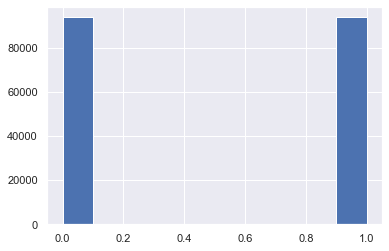

In [181]:
y_train.hist()

In [180]:
# randomly oversample positive samples: create 4x as many 
ROS = imblearn.under_sampling.RandomUnderSampler(random_state=42) 

X_train, y_train = ROS.fit_sample(X_train, y_train)

In [64]:
X_train.shape

(187538, 196)

In [58]:
pd.DataFrame(y_train).describe()

,success
count,187538.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [202]:
import imblearn.under_sampling
#sklearn.metric cross_value_score
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
log_recall, log_precision, log_f1, log_roc   = [], [], [], [] #collect the validation results for both models
rf_recall, rf_precision, rf_f1, rf_roc   = [], [], [], [] #collect the validation results for both models
knn_recall, knn_precision, knn_f1, knn_roc   = [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X_array,y_array):
    
    X_train, y_train = X_array[train_ind], y_array[train_ind]
    X_val, y_val = X_array[val_ind], y_array[val_ind]

#     # setup for the ratio argument of RandomOverSampler initialization
#     n_pos = np.sum(y_train == 1)
#     n_neg = np.sum(y_train == 0)
#     ratio = {1 : n_pos * 2, 0 : n_neg} 

    # randomly oversample positive samples: create 4x as many 
    ROS = imblearn.under_sampling.RandomUnderSampler(random_state=42) 

    X_train, y_train = ROS.fit_sample(X_train, y_train)
    
    # with feature scaling
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val) 
   
    #simple logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_s, y_train)
    y_pred = lr.predict(X_val_s)
    log_recall.append(recall_score(y_val,y_pred))
    log_precision.append(precision_score(y_val,y_pred))
    log_f1.append(f1_score(y_val,y_pred))
    log_roc.append(roc_auc_score(y_val,y_pred))
    print(classification_report(y_val,y_pred))
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rf_recall.append(recall_score(y_val,y_pred))
    rf_precision.append(precision_score(y_val,y_pred))
    rf_f1.append(f1_score(y_val,y_pred))
    rf_roc.append(roc_auc_score(y_val,y_pred))
    print(confusion_matrix(y_val,y_pred))
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val_s)
    knn_recall.append(recall_score(y_val,y_pred))
    knn_precision.append(precision_score(y_val,y_pred))
    knn_f1.append(f1_score(y_val,y_pred))
    knn_roc.append(roc_auc_score(y_val,y_pred))
#    print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.62      0.70     34377
           1       0.50      0.68      0.57     18636

    accuracy                           0.65     53013
   macro avg       0.64      0.65      0.64     53013
weighted avg       0.68      0.65      0.65     53013

[[21825 12552]
 [ 7159 11477]]
              precision    recall  f1-score   support

           0       0.78      0.63      0.70     34155
           1       0.50      0.69      0.58     18858

    accuracy                           0.65     53013
   macro avg       0.64      0.66      0.64     53013
weighted avg       0.68      0.65      0.66     53013

[[21574 12581]
 [ 7010 11848]]
              precision    recall  f1-score   support

           0       0.78      0.63      0.70     34175
           1       0.50      0.69      0.58     18837

    accuracy                           0.65     53012
   macro avg       0.64      0.66      0.64     53012
weighted avg

In [ ]:
# with feature scaling
scaler1 = StandardScaler()
X_train_s = scaler1.fit_transform(X_train)
X_val_s = scaler1.transform(X_val) 
pd.to_pickle('scaler1')

In [200]:
print(np.mean(rf_recall), np.mean(rf_precision), np.mean(rf_f1), np.mean(rf_roc))

0.6173535093367676 0.47943492936617077 0.5397227499824081 0.6269855076136669


In [199]:
print(np.mean(log_recall), np.mean(log_precision), np.mean(log_f1), np.mean(log_roc))
print(np.mean(rf_recall), np.mean(rf_precision), np.mean(rf_f1), np.mean(rf_roc))
print(np.mean(knn_recall), np.mean(knn_precision), np.mean(knn_f1), np.mean(knn_roc))

0.6843389033449367 0.5006813620269972 0.5782739536492563 0.6554783885173006
0.6173535093367676 0.47943492936617077 0.5397227499824081 0.6269855076136669
1.0 0.3515430468573153 0.5202099151406878 0.5000145446083137


In [ ]:
print(classification_report(y_val,y_pred))

In [191]:
print(confusion_matrix(y_val,y_pred))

[[18523 15787]
 [10269  8433]]


In [185]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  6.16865741],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , 29.7483912 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , 29.07694444],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , 29.29412037],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , 59.19127315],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , 29.16324074]])

In [186]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

Logistic Regression Model best F1 score 0.000 at prob decision threshold >= 0.100


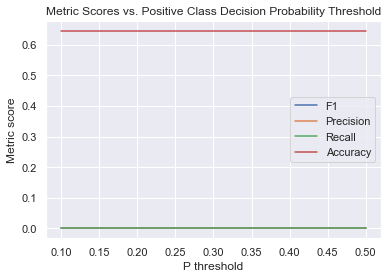

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [201]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    ax.grid(False)
    print(title)
    print(disp.confusion_matrix)

IndexError: list index out of range

In [ ]:
features = df['feature names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature ranking:
1. feature 195 (0.547589)
2. feature 194 (0.270381)
3. feature 193 (0.006396)
4. feature 167 (0.006125)
5. feature 187 (0.006082)
6. feature 135 (0.005620)
7. feature 170 (0.005291)
8. feature 7 (0.004676)
9. feature 171 (0.004130)
10. feature 180 (0.003919)
11. feature 67 (0.003658)
12. feature 128 (0.003591)
13. feature 150 (0.003226)
14. feature 174 (0.003216)
15. feature 162 (0.002962)
16. feature 158 (0.002834)
17. feature 140 (0.002589)
18. feature 71 (0.002583)
19. feature 172 (0.002441)
20. feature 147 (0.002403)
21. feature 164 (0.002317)
22. feature 29 (0.001936)
23. feature 165 (0.001823)
24. feature 53 (0.001813)
25. feature 169 (0.001809)
26. feature 163 (0.001790)
27. feature 176 (0.001731)
28. feature 160 (0.001712)
29. feature 159 (0.001625)
30. feature 6 (0.001617)
31. feature 38 (0.001600)
32. feature 179 (0.001598)
33. feature 183 (0.001519)
34. feature 87 (0.001474)
35. feature 188 (0.001405)
36. feature 112 (0.001393)
37. feature 161 (0.001377)
38.

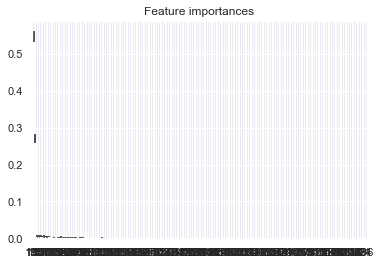

In [119]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


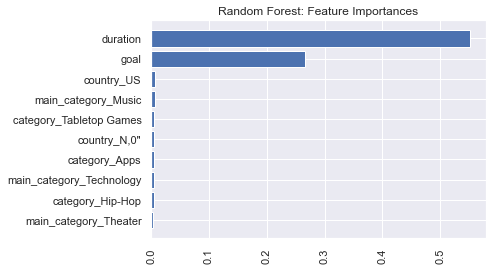

In [162]:
importances1 = pd.Series(rf.feature_importances_, X.columns)
importances1 = importances1.sort_values(ascending = True)
plt.barh(importances1.tail(10).index, importances1.tail(10))
plt.xticks(rotation = 90)
plt.title('Random Forest: Feature Importances')

Text(0.5, 1.0, 'Random Forest: Feature Importances')

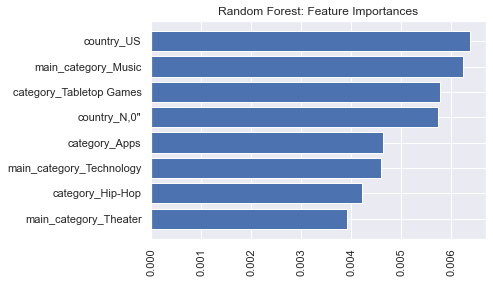

In [161]:
importances1 = pd.Series(rf.feature_importances_, X.columns)
importances1 = importances1.sort_values(ascending = True)
plt.barh(importances1.tail(10).head(8).index, importances1.tail(10).head(8))
plt.xticks(rotation = 90)
plt.title('Random Forest: Feature Importances')

In [124]:
df.columns(['duration'])

TypeError: 'Index' object is not callable

In [32]:
print(rf.feature_importances_)

from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# = permutation_importances(rf, X_train, y_train, r2)

[4.72051541e-04 7.28311154e-04 6.90470021e-04 2.34430885e-04
 7.36765072e-04 6.00245441e-04 1.59732155e-03 4.19147813e-03
 4.34485101e-04 1.23870900e-03 1.35518200e-03 2.21390819e-04
 1.02206663e-04 1.83203247e-04 2.82743561e-04 4.25343535e-04
 2.07093892e-04 3.81876817e-04 8.54054806e-04 2.11667806e-04
 8.30939673e-05 2.56685988e-04 1.14342542e-03 1.01261402e-03
 6.51598273e-04 6.18452025e-04 1.45626127e-04 5.45602862e-04
 2.60468340e-04 1.51121568e-03 1.41819142e-04 6.48494585e-04
 1.19990559e-04 4.54690111e-04 6.95118073e-04 9.20077153e-04
 8.04791729e-04 7.42566337e-04 1.62501017e-03 6.97655808e-04
 4.48839217e-04 9.32324505e-04 1.02651866e-04 4.11994838e-04
 4.82599600e-04 1.87649562e-04 3.52013644e-04 2.94481803e-04
 3.79806344e-04 2.34172452e-04 3.31995921e-04 8.65832564e-04
 4.01324465e-04 1.74119709e-03 1.14105778e-03 3.91837912e-04
 2.52841580e-04 8.20836922e-04 7.09598022e-04 4.03067353e-04
 6.52465022e-04 7.83332987e-04 2.65705816e-04 8.03172614e-05
 6.33895391e-04 3.866402

NameError: name 'model' is not defined

In [117]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{}Feature: %0d, Score: %.5f' % (i,v))

SyntaxError: f-string: empty expression not allowed (<ipython-input-117-34561c3ad02c>, line 4)

In [34]:
print('Logistic regression accuracy scores: ', cv_lm_r2s)
print(f'Logistic mean cv accuracy: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Logistic regression accuracy scores:  [0.6849820798189119, 0.6803201379719206, 0.6858713519631356, 0.680149832920125, 0.6848119003988359]
Logistic mean cv accuracy: 0.683 +- 0.002
ROC AUC score =  0.5717110609287122


In [39]:
recall_score(y_true,y_pred)

0.0

In [ ]:
(276622    0
352867    0
290671    0
125449    0
64300     0
         ..
89881     1
215062    1
370126    0
32208     0
259036    1
Name: success, Length: 79519, dtype: int64, array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
print('Logistic regression accuracy scores: ', cv_lm_r2s)
print(f'Logistic mean cv accuracy: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

In [ ]:
y_pred = lr.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

In [198]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

IndexError: list index out of range

In [ ]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, l.predict_proba(X_test)[:,1]))

In [ ]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)   
    
    #simple logistic regression
    rf = RandomForestClassifier(n_estimators=5)
    rf.fit(X_train_s, y_train)
    cv_lm_r2s.append(rf.score(X_val_s, y_val))

In [ ]:
y_pred = rf.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

In [ ]:
print('Logistic regression accuracy scores: ', cv_lm_r2s)

print(f'Logistic mean cv accuracy: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

In [ ]:
X.columns

In [ ]:
# https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])

In [ ]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

In [ ]:
# Ok, which feature looks promising? We are going to restrict ourselves to one for right now
train_df = X_train.copy()
train_df['success'] = y_train

train_df['state'] = train_df['success'].apply(lambda x: (x and 'success') or 'fail')
train_df.head()

In [ ]:
sns.stripplot(x='main_category',y='state', jitter=True,data=train_df,alpha=0.6);

In [ ]:
import pickle
pickle.dump(lr, open("my_pickled_model.p",'wb'))

In [90]:
model = pd.read_pickle("simp_log_model.pkl")

In [97]:
import pickle
pickle.dump(rf, open("rf_model.pkl",'wb'))

In [ ]:
# Define models to test
model_list = [['GaussianNB', GaussianNB()], 
                ['BernoulliNB', BernoulliNB(alpha=0.5)], 
                ['MultinomialNB', MultinomialNB(alpha=0)],
                ['DecisionTree', DecisionTreeClassifier(criterion = 'gini', max_depth=2, splitter='best')], 
                #['KNN', KNeighborsClassifier(27)], # best k from KNN model below; scale data
                ['LogisticRegression', LogisticRegression(C=1000, penalty='l1')], 
                ['RandomForest', RandomForestClassifier(max_features='auto',n_estimators=10)], 
                ['GradientBoost', GradientBoostingClassifier(n_estimators=500)],
                ['AdaBoost', AdaBoostClassifier(algorithm='SAMME.R',
                      base_estimator=DecisionTreeClassifier(criterion = 'gini', max_depth=2, splitter='best'),
                      n_estimators=2)],
                ['XGBoost', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
                       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=6,
                       min_child_weight=11, missing=-999, n_estimators=500, nthread=4,
                       objective='reg:linear', reg_alpha=0, reg_lambda=1,
                       scale_pos_weight=1, seed=0, silent=1, subsample=0.8)],
                         
#                 ['LogisticRegressionCV', LogisticRegressionCV()]] # scale data; F1 0.62
                ['SVM', SVC(C=10,gamma=0.001,probability=True)]] # scale data; F1 0.57

model_list_s = ['KNN','LogisticRegression','SVM'] 

# Calculate metrics for each model
roc = {}
results_dict = {}
for model in model_list:
    if model[0] in model_list_s:
        X_train = X_train_s
        X_test = X_test_s
    
    model_name = model[0]
    model = model[1]
    
    accuracy = []
    precision_1 = []
    precision_0 = []
    recall_1 = []
    recall_0 = []
    f1_1 = []
    f1_0 = []
    auc = []
        
    # Perform K-Fold CV and calculate metrics for each fold
    kf = KFold(5, random_state=42, shuffle=True) 
    for train_idx, test_idx in kf.split(X, y=y):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision_1.append(precision_score(y_test, y_pred ,pos_label=1))
        precision_0.append(precision_score(y_test, y_pred ,pos_label=0))
        recall_1.append(recall_score(y_test, y_pred, pos_label=1))
        recall_0.append(recall_score(y_test, y_pred, pos_label=0))
        f1_1.append(f1_score(y_test, y_pred, pos_label=1))
        f1_0.append(f1_score(y_test, y_pred, pos_label=0))
        auc.append(roc_auc_score(y_test, y_pred))
        
    # Calculate mean metric across K-folds
    mean_accuracy = np.mean(accuracy)
    mean_precision_1 = np.mean(precision_1)
    mean_precision_0 = np.mean(precision_0)
    mean_recall_1 = np.mean(recall_1)
    mean_recall_0 = np.mean(recall_0)
    mean_f1_1 = np.mean(f1_1)
    mean_f1_0 = np.mean(f1_0)
    mean_auc = np.mean(auc)
    
    # Capture TPR and FPR from last fold for plotting
    y_score = model.predict_proba(X_test)[:,1]
    roc[model_name] = roc_curve(y_test, y_score), mean_auc
    results_dict[model_name] = {"accuracy": mean_accuracy, "precision_s": mean_precision_1, "precision_f": mean_precision_0, "recall_s": mean_recall_1, "recall_f": mean_recall_0, "f1_s": mean_f1_1, "f1_f": mean_f1_0, "auc": mean_auc}
    
    # Print formatted results
    print(model)
    print('\t==============================')
    print('\tAccuracy:', mean_accuracy)
    print('\tAUC:', mean_auc)
    print('\n')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred)) 

In [ ]:
new_df['success, fail'] = df

In [ ]:
X

In [ ]:
small_df = df[['duration','success']]

In [ ]:
small_df.head()

In [ ]:
X, y = small_df.drop('success',axis=1), df['success']
print(X.shape, y.shape)

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)
k_range = list(range(1, 101))
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

X, y = np.array(X), np.array(y)

In [ ]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)  
    
    #simple logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_s, y_train)
    cv_lm_r2s.append(lr.score(X_val_s, y_val))
    #print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

In [ ]:
print('Logistic regression accuracy scores: ', cv_lm_r2s)
print(f'Logistic mean cv accuracy: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
#print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

In [ ]:
pd.to_pickle(lr,'simp_log_model.pkl')

In [ ]:
y_pred = lr.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

In [151]:
df.columns

Index(['category_Academic', 'category_Accessories', 'category_Action',
       'category_Animals', 'category_Animation', 'category_Anthologies',
       'category_Apparel', 'category_Apps', 'category_Architecture',
       'category_Art',
       ...
       'country_N,0"', 'country_NL', 'country_NO', 'country_NZ', 'country_SE',
       'country_SG', 'country_US', 'goal', 'duration', 'success'],
      dtype='object', length=197)

In [150]:
pd.set_option('display.max_columns', None)

In [152]:
cols = df.columns.tolist()

In [154]:
df

,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,category_Digital Art,category_Documentary,category_Drama,category_Drinks,category_Electronic Music,category_Embroidery,category_Events,category_Experimental,category_Fabrication Tools,category_Faith,category_Family,category_Fantasy,category_Farmer's Markets,category_Farms,category_Fashion,category_Festivals,category_Fiction,category_Film & Video,category_Fine Art,category_Flight,category_Food,category_Food Trucks,category_Footwear,category_Gadgets,category_Games,category_Gaming Hardware,category_Glass,category_Graphic Design,category_Graphic Novels,category_Hardware,category_Hip-Hop,category_Horror,category_Illustration,category_Immersive,category_Indie Rock,category_Installations,category_Interactive Design,category_Jazz,category_Jewelry,category_Journalism,category_Kids,category_Knitting,category_Latin,category_Letterpress,category_Literary Journals,category_Literary Spaces,category_Live Games,category_Makerspaces,category_Metal,category_Mixed Media,category_Mobile Games,category_Movie Theaters,category_Music,category_Music Videos,category_Musical,category_Narrative Film,category_Nature,category_Nonfiction,category_Painting,category_People,category_Performance Art,category_Performances,category_Periodicals,category_Pet Fashion,category_Photo,category_Photobooks,category_Photography,category_Places,category_Playing Cards,category_Plays,category_Poetry,category_Pop,category_Pottery,category_Print,category_Printing,category_Product Design,category_Public Art,category_Publishing,category_Punk,category_Puzzles,category_Quilts,category_R&B,category_Radio & Podcasts,category_Ready-to-wear,category_Residencies,category_Restaurants,category_Robots,category_Rock,category_Romance,category_Science Fiction,category_Sculpture,category_Shorts,category_Small Batch,category_Software,category_Sound,category_Space Exploration,category_Spaces,category_Stationery,category_Tabletop Games,category_Taxidermy,category_Technology,category_Television,category_Textiles,category_Theater,category_Thrillers,category_Translations,category_Typography,category_Vegan,category_Video,category_Video Art,category_Video Games,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,goal,duration,success
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30000.0,13.724

In [153]:
cols

['category_Academic',
 'category_Accessories',
 'category_Action',
 'category_Animals',
 'category_Animation',
 'category_Anthologies',
 'category_Apparel',
 'category_Apps',
 'category_Architecture',
 'category_Art',
 'category_Art Books',
 'category_Audio',
 'category_Bacon',
 'category_Blues',
 'category_Calendars',
 'category_Camera Equipment',
 'category_Candles',
 'category_Ceramics',
 "category_Children's Books",
 'category_Childrenswear',
 'category_Chiptune',
 'category_Civic Design',
 'category_Classical Music',
 'category_Comedy',
 'category_Comic Books',
 'category_Comics',
 'category_Community Gardens',
 'category_Conceptual Art',
 'category_Cookbooks',
 'category_Country & Folk',
 'category_Couture',
 'category_Crafts',
 'category_Crochet',
 'category_DIY',
 'category_DIY Electronics',
 'category_Dance',
 'category_Design',
 'category_Digital Art',
 'category_Documentary',
 'category_Drama',
 'category_Drinks',
 'category_Electronic Music',
 'category_Embroidery',
 'categ